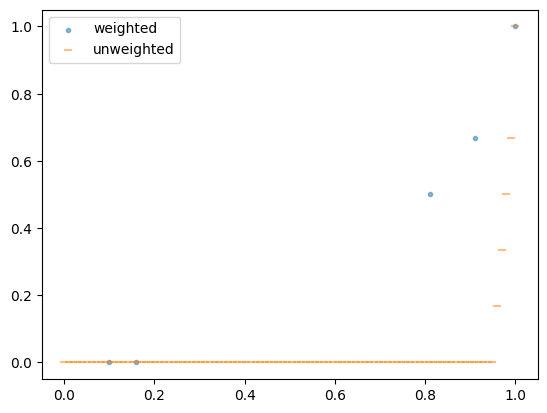

In [10]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(18813823)
n_groups = np.repeat(1.0, 100)
n_sim = 100
id_for_aggregation = stats.randint.rvs(0, 5, size=n_sim)
id_for_aggregation[:60] = 1
rv = stats.poisson(mu=0.1)
sample = rv.rvs(size=n_sim)
df_unitary = pl.DataFrame(
    {"fleet_id": id_for_aggregation, "weight": 1.0, "value": sample}
)
df_weighted = (
    df_unitary.group_by("fleet_id")
    .sum()
    .with_columns(pl.col("value") / pl.col("weight"))
)


def lorenz_curve(frequency, exposure, weighted=True):
    ranking = np.argsort(frequency)
    ranked_frequencies = frequency[ranking]
    ranked_exposure = exposure[ranking]
    cumulated_claims = np.cumsum(ranked_frequencies * ranked_exposure)
    cumulated_claims /= cumulated_claims[-1]
    if weighted:
        cumulated_exposure = np.cumsum(ranked_exposure)
        cumulated_exposure /= cumulated_exposure[-1]
        plt.scatter(
            cumulated_exposure,
            cumulated_claims,
            marker=".",
            alpha=0.5,
            label="weighted",
        )
    else:
        cumulated_exposure = np.linspace(0, 1, len(frequency))
        plt.scatter(
            cumulated_exposure,
            cumulated_claims,
            marker="_",
            alpha=0.5,
            label="unweighted",
        )


lorenz_curve(df_weighted["value"], df_weighted["weight"])
lorenz_curve(df_unitary["value"], df_unitary["weight"], False)
plt.legend()